In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample #Down sample the dataset
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import scale #scale and center data
from sklearn.svm import SVC #Support Vector Classifier
from sklearn.model_selection import GridSearchCV #Cross validation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA #to perform PCA to plot the data

***Import the Data***

Now we load in a dataset from the UCI Machine Learning Repository. Specifically, we are going to use the Credit Card Default dataset. 
This dataset will alow us to predict if someone will default on their credit card payments based on their sex, age and variety of other metrics 

In [2]:
df = pd.read_excel(r"C:\Python\SPV\default of credit card clients.xls", header=1, engine='xlrd')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [4]:
df.rename({'default payment next month' : 'DEFAULT'}, axis = 1, inplace= True)
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [5]:
df.drop('ID', axis = 1, inplace= True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
df.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
DEFAULT      int64
dtype: object

In [7]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

-So education contain 0 - 6 int
It represents:
>0	Không rõ / Không khai báo
>1	Sau đại học (Graduate School)
>2	Đại học (University)
>3	Trung cấp / Cao đẳng (High School)
>4	Cấp 2 (Junior High School) hoặc thấp hơn
>5	Cấp 1 hoặc trình độ rất thấp
>6	Khác (Other)

Therefor Im gonna treat 0 as missing value

In [8]:
df.MARRIAGE.unique()

array([1, 2, 3, 0], dtype=int64)

Just like EDUCATION, MARRIGE ALSO CONTAINS 0 so im gonna assume it is missing data

***Missing Data Part 2**** Dealing with Missing Data

#Questions:
1> Should we delete rows with missing data?
2> Should we impute?("Educated guessing")

In [9]:
len(df.loc[(df["EDUCATION"] == 0) | (df["MARRIAGE"] == 0)])

68

In [10]:
len(df)

30000

68 to 30000 only small percentage of the data in dataset contains missing value so I think we I kind of could drop all the rows contains missing data

In [11]:
#Drop the rows with missing data
df = df.loc[(df['EDUCATION'] != 0) & (df['MARRIAGE'] != 0)]
len(df)

29932

In [12]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6], dtype=int64)

**Downsample the data**

Now im gonna check the balance of our dataset

In [13]:
df_no_default = df.loc[df['DEFAULT'] == 0].copy()
print(f"Non Default data: {len(df_no_default)}")
df_default = df.loc[df['DEFAULT'] == 1].copy()
print(f"Default data: {len(df_default)}")
print(f"Different between Non_default/Default = {len(df_no_default) / len(df_default)}")


Non Default data: 23301
Default data: 6631
Different between Non_default/Default = 3.5139496305232996


It clearly a imbalanced dataset 1 to 3.5 so I could make decision to downsample the data

In [14]:
#Downsample majority class (Non_Default_data)
df_no_default = resample(df_no_default, replace=False, n_samples=len(df_default), random_state=42)

df_downsampled = pd.concat([df_no_default, df_default])
df_downsampled.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
641,130000,2,3,1,28,0,0,0,0,-2,...,0,0,0,2500,1000,0,0,0,0,0
4678,170000,1,3,1,29,0,0,0,0,0,...,35234,32869,33862,7200,7500,1200,1200,1500,1300,0
16004,180000,2,2,1,29,0,0,0,0,0,...,26662,26166,26176,1800,1800,1500,1056,950,1000,0
22974,210000,2,2,2,32,-2,-2,-2,-2,-2,...,0,0,0,979,412,0,0,0,0,0
17535,190000,2,3,1,45,0,0,0,0,0,...,81778,83082,84811,3300,3331,3359,2663,2751,3000,0


In [15]:
len(df_downsampled)

13262

Alright looks much better

Now lets Create the Target and Features or some might says Dependents and Independents

In [16]:
X = df_downsampled[[c for c in df_downsampled if c != 'DEFAULT']].copy() #Independent
y = df_downsampled['DEFAULT'].copy() # Dependet

Now lets decide type of the data numerical or categorical data 

=> categorical data with continuous value represented : [SEX , EDUCATION, MARRIAGE, PAY_, DEFAULT]
numerical data : [AGE, LIMIT_BAL, BILL_AMT, PAY_AMT]

In [17]:
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

pay_cols = [f'PAY_{i}' for i in [0,2,3,4,5,6]]
cols_to_convert = ['SEX' , 'EDUCATION', 'MARRIAGE'] + pay_cols
X[cols_to_convert] = X[cols_to_convert].astype('object')
cat_features = X.select_dtypes(include='object').columns.tolist()
num_features = X.select_dtypes(exclude='object').columns.tolist()
#Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Since Onehot Encoding returns a spare matrix so we need to add the cols name back
def post_onehotencoding_to_df(X_transformed,preprocessor ,cat_features, num_features): 
    """
    Convert sparse matrix output from ColumnTransformer to DataFrame with column names.
    """      
    ohe = preprocessor.named_transformers_['cat']
    ohe_features = ohe.get_feature_names_out(cat_features)
    #concat with num features
    all_features = list(ohe_features) +num_features

    #X_train_transformed
    X_transformed  = pd.DataFrame.sparse.from_spmatrix(X_transformed, columns= all_features)
    return X_transformed

#Pipeline for processing data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features), #One hot coding for categorical features
        ('num', StandardScaler(), num_features)
    ]
)

clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel = 'rbf',C = 1.0, gamma='scale'))
])


#Fit the model through pipeline
clf_pipeline.fit(X_train, y_train)

#predictions
y_pred = clf_pipeline.predict(X_test)

In [19]:
#Check loss 
from sklearn.metrics import hinge_loss
y_score = clf_pipeline.decision_function(X_train)
hinge = hinge_loss(y_train, y_score)
hinge

0.5667755170501879

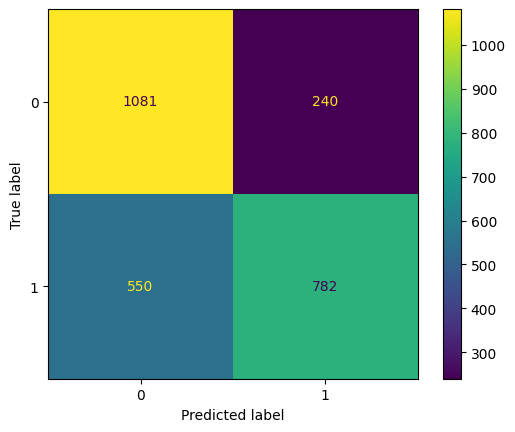

In [20]:
ConfusionMatrixDisplay.from_estimator(clf_pipeline, X_test, y_test)

***So Far it looks alright but not great Lets Optimize Parameters with Cross Validation and GridSearchCV***

In [ ]:
param_grid = [
    {
        'classifier__C': [0.5, 1, 10, 100],
        'classifier__gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
        'classifier__kernel': ['rbf']
    }
]


grid_search = GridSearchCV(
    clf_pipeline,
    param_grid,
    cv = 5, 
    scoring='accuracy'
)

grid_search.fit(X_train, y_train)

print("Best params: ", grid_search.best_params_)
print("Best accuracy", grid_search.best_score_)

Best params:  {'classifier__C': 0.5, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf'}
Best accuracy 0.7038355282949864


***Pretty solid we got 70% accuracy , slightly improved ***

In [23]:
len(df_downsampled.columns)

24

Now lets play around with other method like PCA , others models, PI, PDP, SHAP to insights ,...
But first lets generate confusion matrix again to see what changed


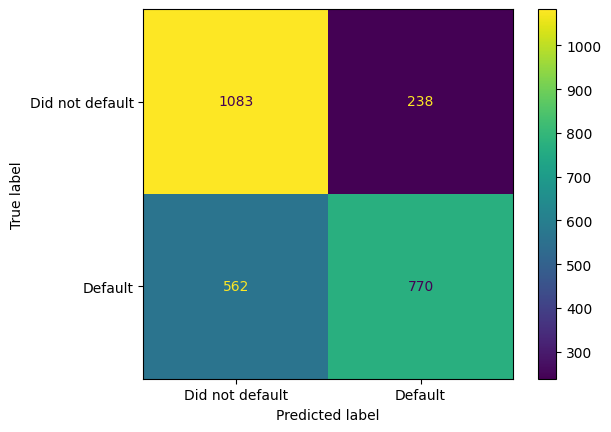

In [ ]:
clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel = 'rbf',C = 0.5, gamma=0.1))#I use new params from the best param above
])

clf_pipeline.fit(X_train, y_train)

ConfusionMatrixDisplay.from_estimator(clf_pipeline,
                       X_test,
                       y_test,
                       display_labels=["Did not default", "Default"])

In [28]:
y_score = clf_pipeline.decision_function(X_train)
hinge = hinge_loss(y_train, y_score)
hinge

0.5559195246876135

***Aight lets try out PCA see if it improve our outcome***

**Before apply PCA Id like to check KDE and viasulize KDE **

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# for col in num_features:
#     sns.kdeplot(df[col], fill=True)
#     plt.title(f'Distribution of {col}')
#     plt.show()

#commented cuz it to long

***Lets check out PCA explained variance ratio***
*A method to see how the features explain the target*

In [33]:
#Check how many feature can explain 95% data so we can reduce dataset's dimensions 
X_train_transformed = preprocessor.fit_transform(X_train) #We need to scale the data before apply to pca

pca = PCA().fit(X_train_transformed)

#cumulative_variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

#Num component we need to explain 95% data
n_compo_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"we need {n_compo_95} to explain 95% information of the data")


we need 21 to explain 95% information of the data


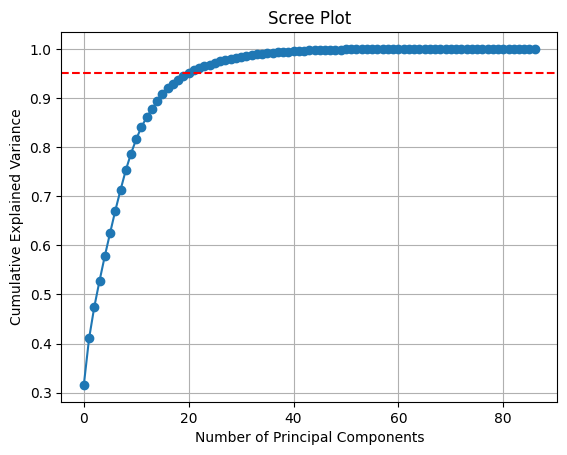

In [34]:
#Lets visuallize
plt.plot(cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

***Aight seem pretty solid to me Lets see how our performance will be !!!***

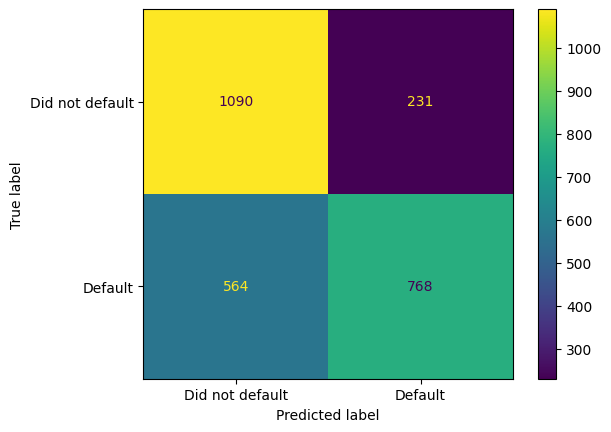

In [38]:
pca = PCA(n_components=21)#by default, PCA() centers the data but not scale it
#Pipeline for processing data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features), #One hot coding for categorical features
        ('num', StandardScaler(), num_features)
        
    ]
)

clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', pca),
    ('classifier', SVC(kernel = 'rbf',C = 0.5, gamma=0.1))#I use new params from the best param above
])

clf_pipeline.fit(X_train, y_train)

ConfusionMatrixDisplay.from_estimator(clf_pipeline,
                       X_test,
                       y_test,
                       display_labels=["Did not default", "Default"])

***Not the best but there is improvement !!!***

But lets see if is there any better params for our new dataset after PCA

In [39]:
param_grid = [
    {
        'classifier__C': [0.5, 1, 10, 100],
        'classifier__gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
        'classifier__kernel': ['rbf']
    }
]


grid_search = GridSearchCV(
    clf_pipeline,
    param_grid,
    cv = 5, 
    scoring='accuracy'
)

grid_search.fit(X_train, y_train)

print("Best params: ", grid_search.best_params_)
print("Best accuracy", grid_search.best_score_)

Best params:  {'classifier__C': 10, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf'}
Best accuracy 0.7048719305753115


In [55]:
from sklearn.model_selection import GridSearchCV, KFold,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, f1_score
import numpy as np

X_train_transformed = preprocessor.fit_transform(X_train)
# Định nghĩa mô hình classification
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'MLP': MLPClassifier(random_state=42, max_iter=10000, n_iter_no_change=3, learning_rate_init=0.001)
}

# Tham số grid
param_grids = {
    'LogisticRegression': {},
    'RandomForest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10],
        'min_samples_split': [2, 5]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 6]
    },
    'MLP': {
        'hidden_layer_sizes': [(10,), (10, 10)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam'],
        'alpha': [0.001, 0.01],
        'learning_rate': ['constant', 'adaptive']
    }
}

# Cross-validation
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# GridSearchCV , because my pc using CPU so im using RandomizedSearchCV for effieciency
grids = {}
for model_name, model in models.items():
    grids[model_name] = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grids[model_name],
        cv=cv,
        scoring='f1',  # hoặc 'accuracy', 'roc_auc', tuỳ vào mục tiêu
        n_jobs=-1
    )
    grids[model_name].fit(X_train_transformed , y_train)
    
    best_params = grids[model_name].best_params_
    best_score = grids[model_name].best_score_

    print(f'✅ Best parameters for {model_name}: {best_params}')
    print(f'🏆 Best score for {model_name}: {best_score:.4f}')


c:\Users\lehoa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


✅ Best parameters for LogisticRegression: {}
🏆 Best score for LogisticRegression: 0.6587


c:\Users\lehoa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


✅ Best parameters for RandomForest: {'n_estimators': 200, 'min_samples_split': 5, 'max_depth': 10}
🏆 Best score for RandomForest: 0.6852


c:\Users\lehoa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\lehoa\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [17:00:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Best parameters for XGBoost: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
🏆 Best score for XGBoost: 0.6879
✅ Best parameters for MLP: {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (10, 10), 'alpha': 0.01, 'activation': 'relu'}
🏆 Best score for MLP: 0.6869


Pretty much the same accuracy but its alright lets try out other method as well

Try out RandomForest

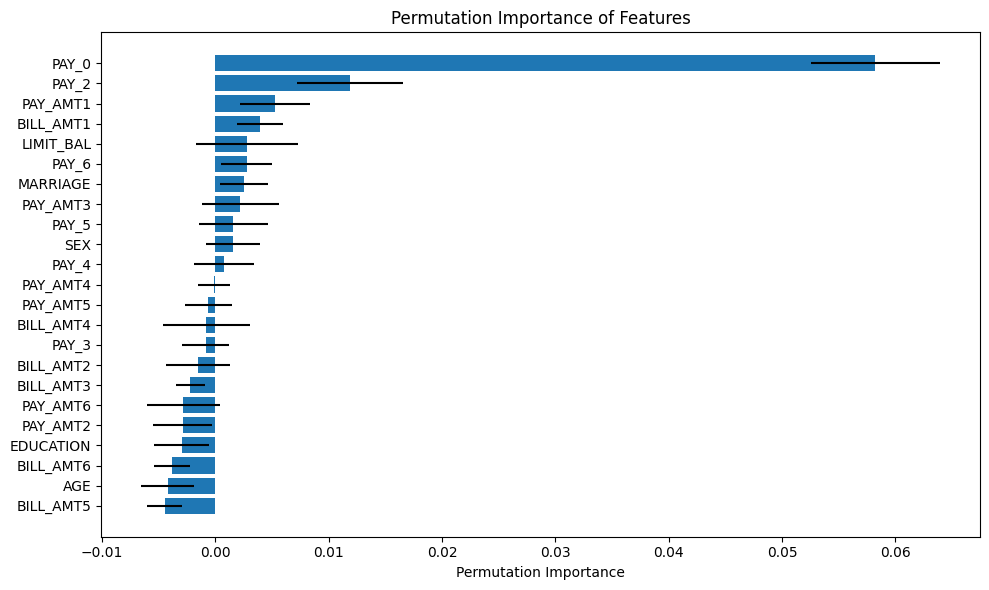

In [ ]:


# Fit model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Tính permutation importance
perm_rf = permutation_importance(
    rf_model,
    X_test,
    y_test,
    n_repeats=10,  # số lần hoán vị (tăng lên nếu muốn kết quả ổn định hơn)
    random_state=42,
    n_jobs=-1
)

# Lấy tên feature từ preprocessor
feature_names = X_test.columns.tolist()

perm_df = pd.DataFrame({
    "feature": feature_names,
    "importance_mean": perm_rf.importances_mean,
    "importance_std": perm_rf.importances_std
}).sort_values(by="importance_mean", ascending=False)

# 5. Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.barh(perm_df["feature"], perm_df["importance_mean"], xerr=perm_df["importance_std"])
plt.xlabel("Permutation Importance")
plt.title("Permutation Importance of Features")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

***From the visualization we can tell that if the person pay or not pay the last time would determine the most the likelihood of that person will be default or not the next time!!!***